<a href="https://colab.research.google.com/github/hyo250/gittest/blob/master/UFC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
cd /content/drive/MyDrive/Colab Notebooks/빅데이터

/content/drive/MyDrive/Colab Notebooks/빅데이터


In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [7]:
help()


You are now leaving help and returning to the Python interpreter.
If you want to ask for help on a particular object directly from the
interpreter, you can type "help(object)".  Executing "help('string')"
has the same effect as typing a particular string at the help> prompt.


In [8]:
pd.set_option('display.max_columns',100)

In [43]:
ufc =pd.read_csv('https://raw.githubusercontent.com/Datamanim/ufc/main/ufc.csv')
ufc.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_wins,B_losses,B_draw,R_wins,R_losses,R_draw,B_Stance,R_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,03/20_2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,1,1,0,1,0,0,Orthodox,Orthodox,165.10,170.18,135.0,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,03/20_2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,2,0,0,4,2,0,Orthodox,Orthodox,187.96,193.04,205.0,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,03/20_2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,0,0,0,4,3,0,Orthodox,Southpaw,187.96,190.50,241.0,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,03/20_2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,0,0,0,0,0,0,Southpaw,Switch,152.40,154.94,115.0,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,03/20_2021,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,4,1,0,5,6,0,Orthodox,Orthodox,180.34,182.88,135.0,167.64,172.72,135.0,29.0,43.0


In [37]:
ufc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   R_fighter     4918 non-null   object 
 1   B_fighter     4918 non-null   object 
 2   Referee       4918 non-null   object 
 3   date          4918 non-null   object 
 4   location      4918 non-null   object 
 5   Winner        4918 non-null   object 
 6   title_bout    4918 non-null   bool   
 7   weight_class  4918 non-null   object 
 8   B_wins        4918 non-null   int64  
 9   B_losses      4918 non-null   int64  
 10  B_draw        4918 non-null   int64  
 11  R_wins        4918 non-null   int64  
 12  R_losses      4918 non-null   int64  
 13  R_draw        4918 non-null   int64  
 14  B_Stance      4918 non-null   object 
 15  R_Stance      4918 non-null   object 
 16  B_Height_cms  4918 non-null   float64
 17  B_Reach_cms   4918 non-null   float64
 18  B_Weight_lbs  4918 non-null 

In [44]:
#2. 성별에 관한 컬럼 Gender를 추가한다. 남성의경우 male, 여성의경우 Female로 표기 (Red, Blue 선수 상관없이 해당선수들의 성별을 하나의 컬럼에 입력)
#성별 컬럼이 따로 없음. weight_class에 woman 이 추가된 경우 여자라고 볼 수 있겠다.
gender=[]
for i in ufc['weight_class']:
  # print(i)
  if i in 'Women':  # ======> 이렇게 하니까 제대로 실행이 안됨 ㅠ 
    gender.append('female')
  else:
    gender.append('male')
ufc['gender']=gender
ufc.head()

#정답코드:
ufc['Gender']=ufc['weight_class'].map(lambda x: 'female' if 'Women' in x else 'male')

In [26]:
# Q3

# Gender 컬럼의 value 발생 빈도확인
print(ufc.Gender.value_counts()) 
print(ufc.gender.value_counts())  #내가 쓴 코드는... 제대로 분리가 안된듯.

male      4500
female     418
Name: Gender, dtype: int64
male    4918
Name: gender, dtype: int64


In [45]:
# Q4

# ‘year’ 컬럼에 해당 경기 발생 년도를 입력하라.
from datetime import datetime, timedelta

ufc['date']=pd.to_datetime(ufc['date'].str[-4:]+'-'+ufc['date'].str[:2]+'-'+ufc['date'].str[3:5])
# ufc['date']=pd.to_datetime(ufc['date'].str[-4:] +"-"+ufc['date'].str[:2]+"-"+ufc['date'].str[3:5])

ufc['year']=ufc['date'].dt.year
ufc.head()


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_wins,B_losses,B_draw,R_wins,R_losses,R_draw,B_Stance,R_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender,Gender,year
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,1,1,0,1,0,0,Orthodox,Orthodox,165.10,170.18,135.0,170.18,177.80,135.0,31.0,27.0,male,male,2021
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,2,0,0,4,2,0,Orthodox,Orthodox,187.96,193.04,205.0,182.88,187.96,185.0,32.0,28.0,male,male,2021
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,0,0,0,4,3,0,Orthodox,Southpaw,187.96,190.50,241.0,187.96,190.50,264.0,32.0,28.0,male,male,2021
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,0,0,0,0,0,0,Southpaw,Switch,152.40,154.94,115.0,160.02,160.02,115.0,28.0,25.0,male,female,2021
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,4,1,0,5,6,0,Orthodox,Orthodox,180.34,182.88,135.0,167.64,172.72,135.0,29.0,43.0,male,female,2021


    year  Gender  date
0   1997    male     1
1   1998    male     1
2   1999    male     1
3   2000    male     3
4   2001    male    10
5   2002    male    10
6   2003    male    14
7   2004    male    22
8   2005    male    42
9   2006    male    93
10  2007    male   111
11  2008    male   150
12  2009    male   172
13  2010    male   216
14  2011    male   259
15  2012    male   279
16  2013  female     8
17  2013    male   323
18  2014  female    23
19  2014    male   382
20  2015  female    34
21  2015    male   359
22  2016  female    42
23  2016    male   400
24  2017  female    55
25  2017    male   382
26  2018  female    68
27  2018    male   393
28  2019  female    90
29  2019    male   421
30  2020  female    78
31  2020    male   367
32  2021  female    20
33  2021    male    89


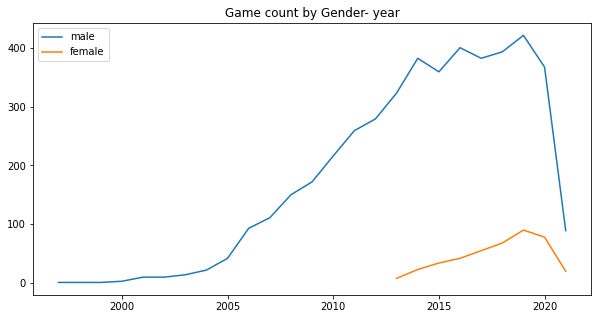

In [108]:
#04-1 ,  년도별 남성,여성각각의 경기숫자를 시각화 하여라
gender_count=ufc.groupby(['year','Gender']).count()['date'].reset_index()
print(gender_count)

import matplotlib.pyplot as plt
# from matplotlib import font_manager
# font_family = font_manager.FontProperties(fname='C:/Windows/Fonts/HMFMOLD.ttf').get_name()
# plt.rc('font', family=font_family)

import seaborn as sns
male_df = gender_count[gender_count.Gender=='male']
female_df=gender_count[gender_count.Gender=='female']
plt.figure(figsize=(10,5))
plt.plot(male_df.year, male_df.date, label='male')
plt.plot(female_df.year, female_df.date, label='female')
plt.title('Game count by Gender- year')
plt.legend()

plt.show()

In [61]:
#모듈 내부 함수 찾는 법
dir(ufc.date.dt)[-10:] #ufc['date'].dt.000 여기에 들어갈 수 있는 함수들.

['timetz',
 'to_period',
 'to_pydatetime',
 'tz',
 'tz_convert',
 'tz_localize',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [74]:
ufc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   R_fighter     4918 non-null   object        
 1   B_fighter     4918 non-null   object        
 2   Referee       4918 non-null   object        
 3   date          4918 non-null   datetime64[ns]
 4   location      4918 non-null   object        
 5   Winner        4918 non-null   object        
 6   title_bout    4918 non-null   bool          
 7   weight_class  4918 non-null   object        
 8   B_wins        4918 non-null   int64         
 9   B_losses      4918 non-null   int64         
 10  B_draw        4918 non-null   int64         
 11  R_wins        4918 non-null   int64         
 12  R_losses      4918 non-null   int64         
 13  R_draw        4918 non-null   int64         
 14  B_Stance      4918 non-null   object        
 15  R_Stance      4918 non-null   object  

In [76]:
ufc.date

0      2021-03-20
1      2021-03-20
2      2021-03-20
3      2021-03-20
4      2021-03-20
          ...    
4913   2000-12-16
4914   2000-04-14
4915   1999-03-05
4916   1998-10-16
4917   1997-10-17
Name: date, Length: 4918, dtype: datetime64[ns]

In [81]:
# Q5

# 몇년도 몇월에 가장 많은 경기가 있었는지 확인하라. 매 달 발생한 경기수를 시각화 하여라
# month_df=ufc.date.dt.strftime('%Y'-'%m').value_count().sort_index()   #이미 date 컬럼이 날짜형이라 이거 못씀.
ufc['date'].astype('str') #날짜 컬럼을 다시 문자열로 만들고
month_df = ufc.date.dt.strftime('%Y-%m').value_counts().sort_index() 
month_df

1997-10     1
1998-10     1
1999-03     1
2000-04     1
2000-12     2
           ..
2020-11    41
2020-12    29
2021-01    31
2021-02    42
2021-03    36
Name: date, Length: 215, dtype: int64

No handles with labels found to put in legend.


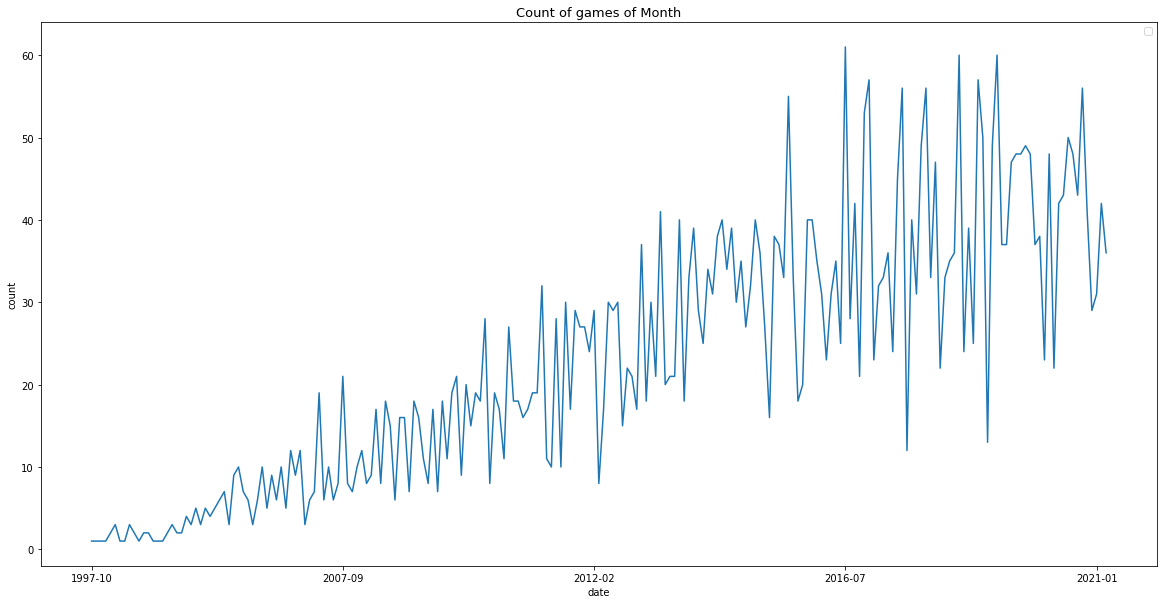

In [106]:
plt.figure(figsize=(20,10))
plt.plot(month_df) #plt.plot(month_df.index, month_df.values) 얘랑 같게 나옴..
plt.xticks([x for x in range(0,len(month_df),int(len(month_df)/4))]) #크게 4등분한 주기만 표시.
plt.title("Count of games of Month",fontsize=13)
plt.xlabel('date')
plt.ylabel("count")
plt.legend()
plt.show()

In [66]:
###########참고###############
#strftime : str from time. 날짜데이터를 문자열로 바꿈. 
#날짜, 시간형식의 문자열을 datetime으로 만들려면 strptime!!
import datetime
now = datetime.datetime.now()
print(now)          # 2015-04-19 12:11:32.669083
 
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)      # 2015-04-19
 

nowTime = now.strftime('%H:%M:%S')
print(nowTime)      # 12:11:32
 
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)  # 2021-06-14 12:20:18.033437

myDatetimeStr = '2015-04-15 12:23:38'
myDatetime = datetime.datetime.strptime(myDatetimeStr, '%Y-%m-%d %H:%M:%S')
print(type(myDatetime)) # [class 'datetime.datetime']
print(myDatetime)       # 2021-06-14 12:20:18


#날짜나 시간을 변경하기 위해서는 replace 메서드를 사용하면 된다.
myDatetime = datetime.datetime.strptime('2015-04-15 12:23:38', '%Y-%m-%d %H:%M:%S')
print(myDatetime)   # 2015-04-15 12:23:38
 
yourDatetime = myDatetime.replace(day=16)
print(myDatetime)   # 2015-04-15 12:23:38
print(yourDatetime) # 2015-04-16 12:23:38

2021-06-14 12:21:18.878978
2021-06-14
12:21:18
2021-06-14 12:21:18
<class 'datetime.datetime'>
2015-04-15 12:23:38
2015-04-15 12:23:38
2015-04-15 12:23:38
2015-04-16 12:23:38


In [94]:
# Q6

# 타이틀매치(column : title_bout=True)에 가장 많은 경기를 심판(column : Referee)본 인물과 그 횟수는?
print(ufc.Referee.unique())
print(ufc.Referee.nunique())
ufc[ufc['title_bout']==True].Referee.value_counts()

['Chris Tognoni' 'Herb Dean' 'Mark Smith' 'Keith Peterson' 'Mike Beltran'
 'Jason Herzog' 'Jerin Valel' 'Marc Goddard' 'Lukasz Bosacki'
 'Dan Miragliotta' 'Anders Ohlsson' 'Kevin Sataki' 'Daniel Movahedi'
 'Rich Mitchell' 'Leon Roberts' 'Jason McCoy' 'Michael Cardoso'
 'Camila Albuquerque' 'Eduardo Herdy' 'Osiris Maia' 'Julio Catarino'
 'Bill Bookwalter' 'Kevin MacDonald' 'Mike King' 'Scott Howard'
 'John Sharp' 'Mark Craig' 'Neil Swailes' 'Robert Romero' 'Joe Coca'
 'Jacob Montalvo' 'Jeff Rexroad' 'Kerry Hatley' 'Wayne Spinola'
 'Larry Carter' 'Peter Hickmott' 'Greg Kleynjans' 'Thomas Fan'
 'Fernando Yamasaki' 'Kevin Mulhall' 'Fernando Portella'
 'VyacheslavKiselev' 'Todd Ronald Anderson' 'Gary Forman' 'Bryan Miner'
 'Steve Rita' 'Andrew Glenn' 'Jim Perdios' 'Steve Perceval' 'Neil Hall'
 'Rebin Saber' 'Mikkel Birch Olsen' 'Fernando Salas Navarro'
 'Yves Lavigne' 'Kevin Dornan' 'John Cooper' 'Vjacheslav Kiselev'
 'George Allen' 'Frank Trigg' 'Gasper Oliver' 'Gary Copeland'
 'Liam Kerri

Herb Dean               91
John McCarthy           72
Marc Goddard            25
Yves Lavigne            21
Dan Miragliotta         17
Mario Yamasaki          14
Steve Mazzagatti        13
Keith Peterson           9
Jason Herzog             6
Josh Rosenthal           6
Mike Beltran             3
Steve Perceval           2
Todd Ronald Anderson     2
Kevin MacDonald          2
Jacob Montalvo           2
Leon Roberts             2
Kevin Mulhall            2
Philippe Chartier        1
Blake Grice              1
Don Turnage              1
Kevin Sataki             1
Robert Madrigal          1
Mark Smith               1
Jerin Valel              1
Name: Referee, dtype: int64

In [92]:
ufc.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_wins,B_losses,B_draw,R_wins,R_losses,R_draw,B_Stance,R_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender,Gender,year
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,1,1,0,1,0,0,Orthodox,Orthodox,165.10,170.18,135.0,170.18,177.80,135.0,31.0,27.0,male,male,2021
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,2,0,0,4,2,0,Orthodox,Orthodox,187.96,193.04,205.0,182.88,187.96,185.0,32.0,28.0,male,male,2021
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,0,0,0,4,3,0,Orthodox,Southpaw,187.96,190.50,241.0,187.96,190.50,264.0,32.0,28.0,male,male,2021
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,0,0,0,0,0,0,Southpaw,Switch,152.40,154.94,115.0,160.02,160.02,115.0,28.0,25.0,male,female,2021
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,4,1,0,5,6,0,Orthodox,Orthodox,180.34,182.88,135.0,167.64,172.72,135.0,29.0,43.0,male,female,2021


In [96]:
# Q7

# 년도에 따른 체급별 타이틀 매치에 관한 데이터를 아래와 같이 새롭게 구성하고 히트맵으로 표시하라(축 label 및 title 설정까지)

pv_table=ufc[ufc['title_bout']==True][['year','weight_class']].value_counts().reset_index().pivot(index='weight_class',columns='year',values=0).fillna(0).astype(int)
         #타이틀매치가 있었던 데이터만 가져오고, 그중 year, weigt_class 컬럼에 따른 counts를 보고, 인덱스 새로 한 것을 pivot화(인덱스, 컬럼, 밸류 입력), 빈곳은 0으로 채우고, int화
pv_table

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
weight_class,,,,,,,,,,,,,,,,,,,,,,
Bantamweight,0,0,0,0,0,0,0,0,0,0,0,3,1,2,4,1,3,1,1,1,2,1
Featherweight,0,0,0,0,0,0,0,0,0,0,0,3,2,2,2,2,2,2,1,2,1,0
Flyweight,0,0,0,0,0,0,0,0,0,0,0,0,1,3,2,2,2,2,1,1,3,0
Heavyweight,0,0,1,0,1,2,3,2,3,2,3,1,2,2,2,1,2,1,3,1,1,0
LightHeavyweight,1,3,1,2,2,3,3,2,3,2,1,3,2,2,1,3,2,2,2,2,2,1
Lightweight,0,2,1,1,0,0,1,2,3,3,3,2,4,2,1,3,3,1,3,2,2,0
Middleweight,0,0,0,0,0,3,4,2,3,1,3,2,2,3,4,2,2,2,1,2,2,0
Welterweight,0,0,0,2,2,2,3,3,2,3,2,2,4,3,3,1,3,3,2,2,1,1
WomenBantamweight,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,3,1,1,2,0,0


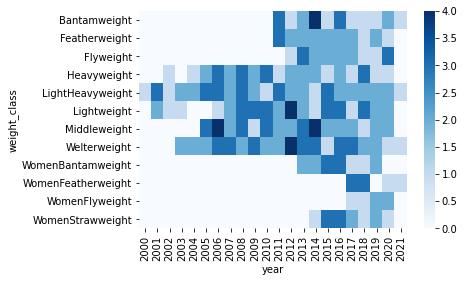

In [103]:
sns.heatmap(pv_table, cmap='Blues')
#cmap: supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm.

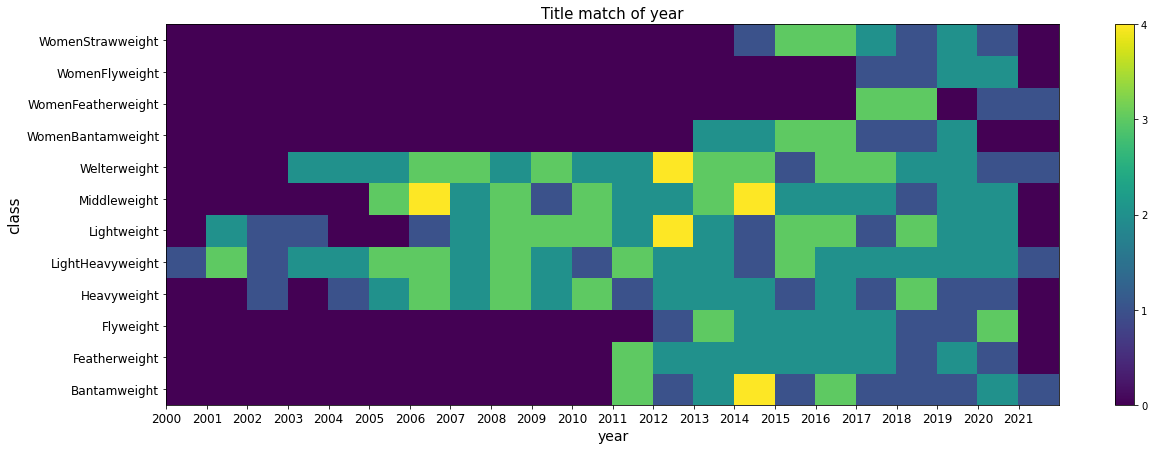

In [104]:
#정답코드
plt.figure(figsize=(20,7))
plt.pcolor(pv_table)
plt.yticks(np.arange(pv_table.shape[0])+0.5,list(pv_table.index),fontsize=12)
plt.xticks(np.arange(pv_table.shape[1]),list(pv_table.columns),fontsize=12)
plt.xlabel('year',fontsize=14)
plt.ylabel('class',fontsize=15)
plt.title('Title match of year',fontsize=15)
plt.colorbar(ticks=[0,1,2,3,4])
plt.show()

In [109]:
ufc.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_wins', 'B_losses', 'B_draw', 'R_wins',
       'R_losses', 'R_draw', 'B_Stance', 'R_Stance', 'B_Height_cms',
       'B_Reach_cms', 'B_Weight_lbs', 'R_Height_cms', 'R_Reach_cms',
       'R_Weight_lbs', 'B_age', 'R_age', 'gender', 'Gender', 'year'],
      dtype='object')

In [112]:
ufc.Winner

0        Red
1        Red
2        Red
3       Blue
4       Blue
        ... 
4913     Red
4914     Red
4915     Red
4916     Red
4917     Red
Name: Winner, Length: 4918, dtype: object

In [113]:
# Q8 #바로 정답봤다..ㅠ

# stance가 다른 선수가 붙었을때 각 stance에 따른 승률을 구하여라. 결과는 아래와 같다. 
# (stance1 : 승률 높은 스탠스 , stance2: 승률 낮은 스탠스, ratio: 승률 높은 스탠스의 승률

df_ratio = ufc[['B_Stance','R_Stance','Winner']].copy()

df_ratio['Winner_blue'] = df_ratio.loc[:,'Winner'].map(lambda x: 1 if x=='Blue' else 0).values #df.ratio에서 모든 행에 대한 winner를 가져오는데, Winner가 blue라면 1이라 표시.
df_ratio['Winner_red'] = df_ratio.loc[:,'Winner'].map(lambda x: 1 if x=='Red' else 0).values #red일 때 1 표시
df_ratio['Winner_draw'] = df_ratio.loc[:,'Winner'].map(lambda x: 1 if x=='Draw' else 0).values #
df_ratio =df_ratio.drop('Winner',axis=1) #어차피 승률 계산했으니 이 컬럼은 빼는 것.

display(df_ratio['Winner_blue'])
display(df_ratio['Winner_red'])
display(df_ratio['Winner_draw'])
display(df_ratio)

0       0
1       0
2       0
3       1
4       1
       ..
4913    0
4914    0
4915    0
4916    0
4917    0
Name: Winner_blue, Length: 4918, dtype: int64

0       1
1       1
2       1
3       0
4       0
       ..
4913    1
4914    1
4915    1
4916    1
4917    1
Name: Winner_red, Length: 4918, dtype: int64

0       0
1       0
2       0
3       0
4       0
       ..
4913    0
4914    0
4915    0
4916    0
4917    0
Name: Winner_draw, Length: 4918, dtype: int64

,B_Stance,R_Stance,Winner_blue,Winner_red,Winner_draw
0,Orthodox,Orthodox,0,1,0
1,Orthodox,Orthodox,0,1,0
2,Orthodox,Southpaw,0,1,0
3,Southpaw,Switch,1,0,0
4,Orthodox,Orthodox,1,0,0
...,...,...,...,...,...
4913,Switch,Orthodox,0,1,0
4914,Orthodox,Orthodox,0,1,0
4915,Orthodox,Orthodox,0,1,0
4916,Orthodox,Southpaw,0,1,0


In [114]:
df_ration_diff = df_ratio[['B_Stance','R_Stance']].value_counts().reset_index().rename(columns={0:'counts'}) #
display(df_ration_diff)

,B_Stance,R_Stance,counts
0,Orthodox,Orthodox,2811
1,Orthodox,Southpaw,774
2,Southpaw,Orthodox,738
3,Southpaw,Southpaw,229
4,Switch,Orthodox,159
5,Orthodox,Switch,107
6,Switch,Southpaw,40
7,Southpaw,Switch,37
8,Orthodox,Open Stance,10
9,Switch,Switch,8


In [143]:
ratio_target = df_ratio.groupby(['B_Stance','R_Stance']).agg('sum').reset_index()
display(ratio_target)
display(ratio_target.shape)

,B_Stance,R_Stance,Winner_blue,Winner_red,Winner_draw
0,Open Stance,Orthodox,0,1,0
1,Open Stance,Southpaw,1,2,0
2,Orthodox,Open Stance,3,7,0
3,Orthodox,Orthodox,1024,1737,50
4,Orthodox,Southpaw,255,507,12
5,Orthodox,Switch,39,66,2
6,Southpaw,Open Stance,0,1,0
7,Southpaw,Orthodox,280,439,19
8,Southpaw,Southpaw,79,146,4
9,Southpaw,Switch,13,24,0


(13, 5)

In [144]:
ratio_target_diff = ratio_target.loc[ratio_target.B_Stance != ratio_target.R_Stance] #둘의 체급이 다를 때! 즉, 위의 표에서 0번행, 3번행, 12번행 빼고 나머지.
display(ratio_target_diff)
display(ratio_target_diff.shape)

,B_Stance,R_Stance,Winner_blue,Winner_red,Winner_draw
0,Open Stance,Orthodox,0,1,0
1,Open Stance,Southpaw,1,2,0
2,Orthodox,Open Stance,3,7,0
4,Orthodox,Southpaw,255,507,12
5,Orthodox,Switch,39,66,2
6,Southpaw,Open Stance,0,1,0
7,Southpaw,Orthodox,280,439,19
9,Southpaw,Switch,13,24,0
10,Switch,Orthodox,68,88,3
11,Switch,Southpaw,15,25,0


(10, 5)

In [148]:
dic={}
for value in ratio_target_diff.values:
    lst =[value[0],value[1]] #위의 표에서 B_stance의 값과 R_stance의 값을 한개의 리스트로 묶어서 가져옴.
    print(sorted(lst)) #['Open Stance', 'Orthodox']
                      # ['Open Stance', 'Southpaw']
                      # ['Open Stance', 'Orthodox']
                      # ['Orthodox', 'Southpaw']
                      # ['Orthodox', 'Switch']
                      # ['Open Stance', 'Southpaw']
                      # ['Orthodox', 'Southpaw']
                      # ['Southpaw', 'Switch']
                      # ['Orthodox', 'Switch']
                      # ['Southpaw', 'Switch']

    # print(len(sorted(lst)))  2 2 2 2 2 2 모든 리스트에는 위의 컬럼 한개씩 값이 들어가 2개가 한쌍을 이룸. 
    if lst != sorted(lst): #정렬된 리스트에 없는 조합인 경우에
        target = value[1]+"_"+value[0] #이러한 조합을 추가해라.. 
        #print(target)
        #print(dic)
        if target in dic.keys():
            dic[target][0] += value[3]
            dic[target][1] += value[2]
            dic[target][2] += value[4]
        else:
            dic[target] = [value[3], value[2],value[4]]
            
    else:
        target = value[0]+"_"+value[1]
        if target in dic.keys():
            dic[target][0] += value[2]
            dic[target][1] += value[3]
            dic[target][2] += value[4]
        else:
            dic[target] = [value[2],value[3],value[4] ]
    
sort_dic = {}

for key,value in dic.items():
    if value[0] <= value[1]:
        new_key = key.split('_')[1]+"_"+key.split('_')[0]
        sort_dic[new_key] = [value[1],value[0],value[2]]
        
    else:
        sort_dic[key] =value

ratio_df  = pd.DataFrame(sort_dic).T.rename(columns={0:'win',1:'lose',2:'draw'})

ratio_df['ratio'] =ratio_df['win']/(ratio_df['win']+ratio_df['lose']+ratio_df['draw'])*100

sp = pd.DataFrame(list(ratio_df.reset_index()['index'].str.split('_')))
display(sp)
ratio_fi = pd.concat([sp,ratio_df['ratio'].reset_index(drop=True)],axis=1).rename(columns={0:'stance1',1:'stance2'})\
                .sort_values('ratio',ascending=False)

['Open Stance', 'Orthodox']
['Open Stance', 'Southpaw']
['Open Stance', 'Orthodox']
['Orthodox', 'Southpaw']
['Orthodox', 'Switch']
['Open Stance', 'Southpaw']
['Orthodox', 'Southpaw']
['Southpaw', 'Switch']
['Orthodox', 'Switch']
['Southpaw', 'Switch']


,0,1
0,Open Stance,Orthodox
1,Southpaw,Open Stance
2,Southpaw,Orthodox
3,Switch,Orthodox
4,Switch,Southpaw


In [147]:
  ratio_fi

,stance1,stance2,ratio
0,Open Stance,Orthodox,63.636364
2,Southpaw,Orthodox,52.050265
4,Switch,Southpaw,50.649351
3,Switch,Orthodox,50.375940
1,Southpaw,Open Stance,50.000000


In [149]:
# Q9

# 현재 하나의 row에 Red,Blue 2명의 데이터가 존재한다. 하나의 row에 한 선수의 정보가 들어가도록 아래와 같은 새로운 데이터프레임 newUfc를 정의하라.
# R_ ,B_ 가 없는 컬럼들은 동일한 컬럼명으로 추가

# Winner 컬럼의 경우 승리한 경우 1, 패배하거나 비긴 경우 0 으로 변환

ufc['R_Winner'] = ufc['Winner'].map(lambda x: 1 if x =='Red' else 0)
ufc['B_Winner'] = ufc['Winner'].map(lambda x: 1 if x =='Blue' else 0)

R_ = [x  for x in ufc.columns if 'R_' in x]
S_ = [x  for x in ufc.columns if 'B_' in x]
else_col = [x  for x in ufc.columns if (x not in R_) and (x not in S_) ]
else_col.remove('Winner')

Rdf = ufc[R_+else_col]
Rdf.columns = [x[2:] for x in R_] +else_col

Sdf = ufc[S_+else_col]
Sdf.columns = [x[2:] for x in S_] +else_col

newUfc = pd.concat([Rdf,Sdf])
newUfc.head(3)

,fighter,wins,losses,draw,Stance,Height_cms,Reach_cms,Weight_lbs,age,Winner,Referee,date,location,title_bout,weight_class,gender,Gender,year
0,Adrian Yanez,1,0,0,Orthodox,170.18,177.80,135.0,27.0,1,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",False,Bantamweight,male,male,2021
1,Trevin Giles,4,2,0,Orthodox,182.88,187.96,185.0,28.0,1,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",False,Middleweight,male,male,2021
2,Tai Tuivasa,4,3,0,Southpaw,187.96,190.50,264.0,28.0,1,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",False,Heavyweight,male,male,2021


In [152]:
# Q10

# 각 선수(name)의 첫시합과 마지막 시합날짜의 차이를 구하여 현역활동 기간을 일(days)수로 표현하여 데이터프레임을 만들고 Active_per 변수에 저장하라. 만약 대회를 1번만 참가하였다면 현역활동 기간을 1로 입력한다. 활동기간이 긴 순서대로 정렬하라
lst= [] 
for name in newUfc.fighter.unique():
    df = newUfc.loc[newUfc.fighter ==name]
    df = df.sort_values('date')
    if len(df) ==1:
        lst.append(np.timedelta64(1, 'D'))
        
    else:
        lst.append(df.date.values[-1] -df.date.values[0]) #마지막 일 - 최초 시작 일 인듯.

Active_per = pd.DataFrame([newUfc.fighter.unique(),lst]).T.rename(columns={0:'name',1:'days'})

Active_per['days'] = Active_per['days'].dt.days

Active_per = Active_per.sort_values('days',ascending=False).reset_index(drop=True) #날짜 기준 내림차순. 

Active_per

,name,days
0,Vitor Belfort,7512
1,Robbie Lawler,6686
2,BJ Penn,6399
3,Andrei Arlovski,6357
4,Diego Sanchez,5649
...,...,...
1467,Richie Smullen,1
1468,Joe Giannetti,1
1469,Abu Azaitar,1
1470,Kanako Murata,1


In [153]:
# Q11

# 각 선수들의 활동기간상의 최대 연승 횟수를 파악하려한다. (Winner 컬럼의 결과가 1인 경우를 기준으로 연승여부를 판단하라.) 
# 선수명 연승 횟수를 담은 데이터프레임을 만들고 steakWin 변수에 저장하라. 연승횟수가 많은 선수 순서대로 정렬하라
new_lst= []
for value in newUfc.fighter.unique():
    each_df = newUfc[['Winner','date']][newUfc.fighter ==value].sort_values('date',ascending=False)
    if len(each_df[::-1][['Winner']].Winner.unique()) ==1 and each_df[::-1][['Winner']].Winner.unique()[0] ==0:
        new_lst.append([value,0])
    else:
        max_count =max([len(x) for x in ''.join(each_df[::-1][['Winner']]\
                                                 .Winner.astype('str').values).split('0') if x!=''])
        new_lst.append([value,max_count])

steakWin = pd.DataFrame(new_lst).rename(columns={0:'name',1:'steakWinCount'})\
                             .sort_values('steakWinCount',ascending=False)\
                             .reset_index(drop=True)

# newUfc.loc[newUfc.fighter =='Georges St-Pierre'].sort_values('date',ascending=False)

steakWin =steakWin.sort_values(['steakWinCount','name'],ascending=False).reset_index(drop=True)